# Digit recognition with NN
In this notebook I am going to learn more about practical use of Neural Networks 

In [62]:
# libraries 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import callbacks 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [63]:
# load mnist data set 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [64]:
# Right format for numbers from 0 to 1 
X_train = X_train / 255 
X_test = X_test / 255 

In [65]:
# create a model 
model = keras.Sequential() 

# Add a flatten layer for the input 
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# output layer use softmax for probabilities
model.add(layers.Dense(10, activation='softmax'))

/Users/minimuh322/miniconda3/envs/study/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [68]:
history = model.fit(X_train, y_train, epochs=40, validation_split=0.2)

Epoch 1/40


In [ ]:
y_prob = model.predict(X_train)
y_pred = y_prob.argmax(axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
accuracy_score(y_train,y_pred)

0.9933833333333333

Plot history and have a look if the train is overfitted or underfitted 

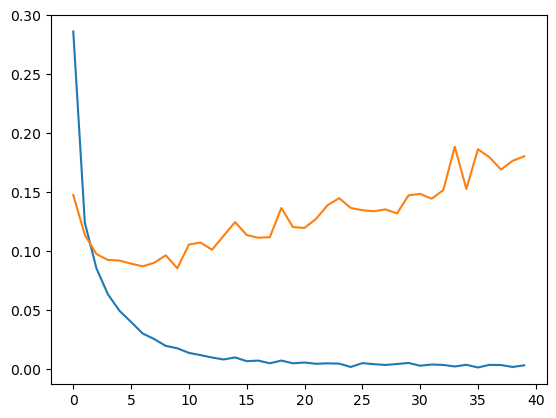

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

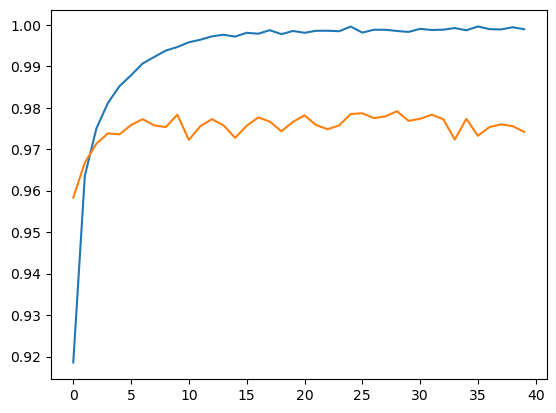

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
test_df = pd.read_csv('data/test.csv')
test_values = test_df.values

test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [ ]:
test_out = model.predict(test_values_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
y =test_out.argmax(axis=1)

In [ ]:
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('submission.csv')